In [1]:
from google.colab import files
uploaded=files.upload()

Saving book.csv to book.csv


# REQUIRED LIBRARIES

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

Data processing

In [20]:
Books_data = pd.read_csv("book.csv",encoding='latin1')
Books_data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [9]:
Books_data.shape

(10000, 3)

In [10]:
list(Books_data)

['User.ID', 'Book.Title', 'Book.Rating']

In [11]:
Books_data.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [12]:
Books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [13]:
Books_data.isnull().sum()

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [19]:
Books_data.sort_values('User.ID')

,User.ID,Book.Title,Book.Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [21]:
Books_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [22]:
Books_data

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


# Re-naaming the variable names

In [24]:
Books_data1 = Books_data.rename(columns={'User.ID': 'UserID', 'Book.Title': 'BookTitle', 'Book.Rating': 'BookRating'})
Books_data1

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [25]:
list(Books_data1)

['UserID', 'BookTitle', 'BookRating']

#number of unique users in the dataset

In [27]:
len(Books_data1)

10000

In [28]:
len(Books_data1.UserID.unique()) 

2182

In [30]:
Books_data1['BookRating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: BookRating, dtype: int64

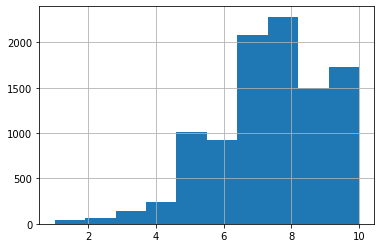

In [31]:
Books_data1['BookRating'].hist()

In [32]:
len(Books_data1.BookTitle.unique())    # unique names 

9659

In [33]:
Books_data1.BookTitle.value_counts()   # count of BookTitle 

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: BookTitle, Length: 9659, dtype: int64

In [34]:
user_Books_data2 = Books_data1.pivot_table(index='UserID',columns='BookTitle',values='BookRating')

In [35]:
user_Books_data2              # nan means not the BooksTittles  

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [36]:
user_Books_data2.iloc[0]     

BookTitle
 Jason, Madison &amp                                                      NaN
 Other Stories;Merril;1985;McClelland &amp                                NaN
 Repairing PC Drives &amp                                                 NaN
'48                                                                       NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities     NaN
                                                                           ..
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character   NaN
\Well, there's your problem\: Cartoons                                    NaN
iI Paradiso Degli Orchi                                                   NaN
stardust                                                                  NaN
Ã?Â?bermorgen.                                                            NaN
Name: 8, Length: 9659, dtype: float64

In [37]:
user_Books_data2.iloc[1]

BookTitle
 Jason, Madison &amp                                                      NaN
 Other Stories;Merril;1985;McClelland &amp                                NaN
 Repairing PC Drives &amp                                                 NaN
'48                                                                       NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities     NaN
                                                                           ..
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character   NaN
\Well, there's your problem\: Cartoons                                    NaN
iI Paradiso Degli Orchi                                                   NaN
stardust                                                                  NaN
Ã?Â?bermorgen.                                                            NaN
Name: 9, Length: 9659, dtype: float64

In [38]:
user_Books_data2.iloc[200]    

BookTitle
 Jason, Madison &amp                                                      NaN
 Other Stories;Merril;1985;McClelland &amp                                NaN
 Repairing PC Drives &amp                                                 NaN
'48                                                                       NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities     NaN
                                                                           ..
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character   NaN
\Well, there's your problem\: Cartoons                                    NaN
iI Paradiso Degli Orchi                                                   NaN
stardust                                                                  NaN
Ã?Â?bermorgen.                                                            NaN
Name: 757, Length: 9659, dtype: float64

In [39]:
list(user_Books_data2)

[' Jason, Madison &amp',
 ' Other Stories;Merril;1985;McClelland &amp',
 ' Repairing PC Drives &amp',
 "'48",
 "'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities",
 '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
 '01-01-00: A Novel of the Millennium',
 '1,401 More Things That P*Ss Me Off',
 '10 Commandments Of Dating',
 '100 Great Fantasy Short, Short Stories',
 '1001 Brilliant Ways to Checkmate',
 '101 Bright Ideas: Esl Activities for All Ages',
 '101 Dalmatians',
 '101 Essential Tips: House Plants',
 '101 Telephone Jokes',
 '101 Wacky Computer Jokes',
 '101 Ways to Make Money at Home',
 '11 Edward Street',
 '11th Hour',
 '13 99 Euros',
 '14,000 Things to Be Happy About',
 '1984',
 '1st to Die: A Novel',
 '20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.',
 '20 Years of Censored News',
 '20,000 Leagues Under the Sea (Wordsworth Collection)',
 '20,001 Names for Baby',
 '2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 

#Impute those NaNs with 0 values

In [40]:
user_Books_data2.fillna(0, inplace=True) # filling with nal with 0 to rectify the mathenatical error

In [41]:
user_Books_data2.shape

(2182, 9659)

In [44]:
# from scipy.spatial.distance import cosine correlation
# Calculating Cosine Similarity between Users

from sklearn.metrics import pairwise_distances

In [45]:
user_sim = 1 - pairwise_distances( user_Books_data2.values,metric='cosine')

#user_sim = 1 - pairwise_distances( user_df.values,metric='correlation')

In [46]:
user_sim.shape

(2182, 2182)

#Store the results in a dataframe

In [47]:
user_sim_df = pd.DataFrame(user_sim)

#Set the index and column names to user ids

In [48]:
user_sim_df.index   = Books_data1.UserID.unique()

In [49]:
user_sim_df.columns = Books_data1.UserID.unique()

In [50]:
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


# Nullifying diagonal values

In [51]:
np.fill_diagonal(user_sim, 0)

In [52]:
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


#Most Similar Users

In [54]:
user_sim_df.max()   # i want to see the max value

276726    0.000000
276729    0.000000
276736    0.000000
276737    0.000000
276744    0.000000
            ...   
162107    0.000000
162109    0.000000
162113    0.023464
162121    0.000000
162129    0.000000
Length: 2182, dtype: float64

In [55]:
user_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [56]:
Books_data1[(Books_data1['UserID']==276729) | (Books_data1['UserID']==276729)]

,UserID,BookTitle,BookRating
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


In [58]:
user_1=Books_data1[Books_data1['UserID']==276726]
user_1

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5


In [59]:
user_2=Books_data1[Books_data1['UserID']==276729]
user_2

,UserID,BookTitle,BookRating
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


In [60]:
user_3=Books_data1[Books_data1['UserID']==276736]
user_3

,UserID,BookTitle,BookRating
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [61]:
user_4=Books_data1[Books_data1['UserID']==276737]
user_4

,UserID,BookTitle,BookRating
4,276737,The Mummies of Urumchi,6


In [62]:
user_5=Books_data1[Books_data1['UserID']==276744]
user_5

,UserID,BookTitle,BookRating
5,276744,The Kitchen God's Wife,7


In [63]:
user_6=Books_data1[Books_data1['UserID']==162107]
user_6

,UserID,BookTitle,BookRating
9987,162107,What's Bred in the Bone,7


In [64]:
user_7=Books_data1[Books_data1['UserID']==162109]
user_7

,UserID,BookTitle,BookRating
9988,162109,The Flower in the Skull,10


In [65]:
user_8=Books_data1[Books_data1['UserID']==162113]
user_8

,UserID,BookTitle,BookRating
9989,162113,The Cape Ann (Contemporary American Fiction),8


In [67]:
user_9=Books_data1[Books_data1['UserID']==162121]
user_9

,UserID,BookTitle,BookRating
9990,162121,The Cloister Walk,7
9991,162121,Open Water,5
9992,162121,The Evolution of Jane,8
9993,162121,AT PARADISE GATE,8
9994,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [68]:
user_10=Books_data1[Books_data1['UserID']==162129]
user_10

,UserID,BookTitle,BookRating
9999,162129,Kids Say the Darndest Things,6


In [69]:
pd.merge(user_2,user_4,on='BookTitle',how='inner')
pd.merge(user_2,user_4,on='BookTitle',how='outer')

,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,276729.0,Clara Callan,3.0,NaN,NaN
1,276729.0,Decision in Normandy,6.0,NaN,NaN
2,NaN,The Mummies of Urumchi,NaN,276737.0,6.0


In [70]:
pd.merge(user_5,user_7,on='BookTitle',how='inner')
pd.merge(user_5,user_7,on='BookTitle',how='outer')

,UserID_x,BookTitle,BookRating_x,UserID_y,BookRating_y
0,276744.0,The Kitchen God's Wife,7.0,NaN,NaN
1,NaN,The Flower in the Skull,NaN,162109.0,10.0


In [72]:
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>><<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# RESULTS AND INFERENCES

# A recommendation system has been build and the persons having similarities
# selected and recommended the books to read by others persons 

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>><<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


# A recommendation system has been build and the persons having similarities
# selected and recommended the books to read by others persons 